# Explore here

In [2]:
import os
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

2024-06-21 14:03:00.786619: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-21 14:03:02.061088: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-21 14:03:04.709966: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-21 14:03:09.249942: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
with zipfile.ZipFile('../data/processed/train.zip', 'r') as z:
    z.extractall('../data/raw')

with zipfile.ZipFile('../data/processed/test1.zip', 'r') as z:
    z.extractall('../data/raw')

In [5]:
import shutil
import os

# Directorios de origen y destino
data_dir = '../data/raw'
train_folder = '../data/raw/train'
test_folder = '../data/raw/test1/'

# Directorios de destino específicos para dog y cat
dog_folder = os.path.join(data_dir, 'dog')
cat_folder = os.path.join(data_dir, 'cat')

# Crear carpetas solo si no existen
os.makedirs(dog_folder, exist_ok= True)
os.makedirs(cat_folder, exist_ok= True)

# Mover archivos dog a la carpeta dog y archivos cat a la carpeta cat
for filename in os.listdir(train_folder):
    # Obtener la ruta completa del archivo de origen
    source_path = os.path.join(train_folder, filename)
    
    if 'dog' in filename.lower():
        # Obtener la ruta completa del archivo de destino en la carpeta dog
        destination_path = os.path.join(dog_folder, filename)
        
        # Mover solo si la carpeta de destino no contiene ya el archivo
        if not os.path.exists(destination_path):
            shutil.move(source_path, destination_path)
    elif 'cat' in filename.lower():
        # Obtener la ruta completa del archivo de destino en la carpeta cat
        destination_path = os.path.join(cat_folder, filename)
        
        # Mover solo si la carpeta de destino no contiene ya el archivo
        if not os.path.exists(destination_path):
            shutil.move(source_path, destination_path)

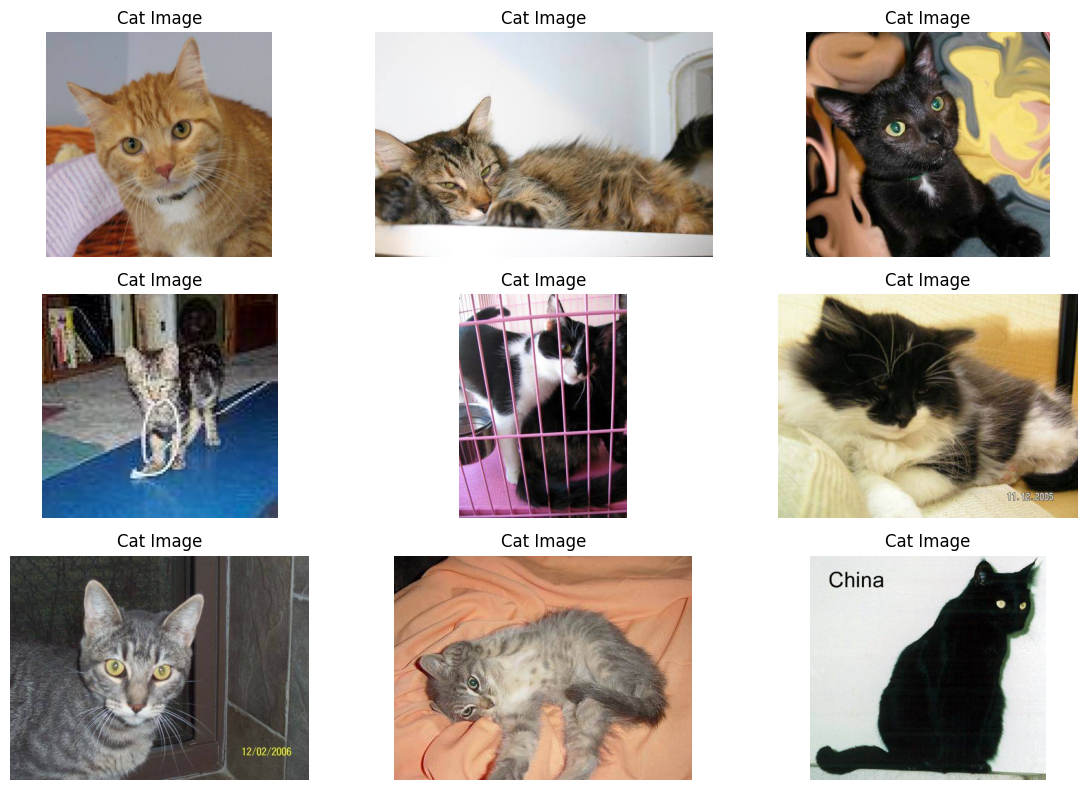

In [7]:

# Import and Check first 9 Dog Pictures

# Path to the directory containing your image data
data_dir = '../data/raw'

# Get a list of all cat image file names
cats_subfolder = os.path.join(data_dir, 'cat')

# Get a list of all Cat image file names
cats_image_files = os.listdir(cats_subfolder)

# Load the first nine cat images
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limit to available cat images
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Create a single figure to display all cat images
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define a few rules for DataGen
train_dir = '../data/raw'
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=['dog', 'cat'] 
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=['test1'] 
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 1 classes.


In [2]:
# Move the Data Through the Neural Network
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape=(200,200,3),filters=64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units=4096,activation='relu'))
model.add(Dense(units=4096,activation='relu'))
model.add(Dense(units=2, activation='softmax'))

/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-21 12:35:58.858970: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-06-21 12:35:59.288952: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-06-21 12:35:59.440558: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-06-21 12:35:59.664789: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-06-21 12:35:59.744826: W external/local_tsl/tsl/fr

In [13]:
# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [14]:
# Train the Model
model.fit(train_data, epochs=1)

/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 1539s 33s/step - accuracy: 0.5207 - loss: 637.9365


In [16]:
model.save("/workspaces/Image/models/model1.h5")